# Quantum Systems Simulation Results

## Bloch Oscillations
- Implementation of breathing and oscillatory modes
- Visualization of wavefunction evolution in time
- Demonstrates quantum tunneling effects

## Field-Flip System
- Simulation of directed transport with field flipping
- Shows alternating field direction effects
- Tracks wavefunction propagation

## Angular Momentum System
- Calculation of rigid body Hamiltonian eigenvalues
- Verification of commutation relations
- Analysis of asymmetric top energy distribution

## Pullen-Edmonds System
- 2D quantum oscillator with coupling
- Visualization of eigenstate wavefunctions
- Energy level calculations

## Bose-Hubbard Dimer
- Fixed particle number analysis
- Multiple calculation methods:
    - Penalty term approach
    - Projection to fixed particle subspace
    - Jordan-Schwinger representation
- Comparison of different methodologies

## Lindblad Master Equation
- Open quantum system dynamics
- Time evolution of particle numbers
- Demonstration of dissipative effects

## Double Well Potential
- Analysis of tunneling dynamics
- Energy level structure
- Wavefunction visualization in position space

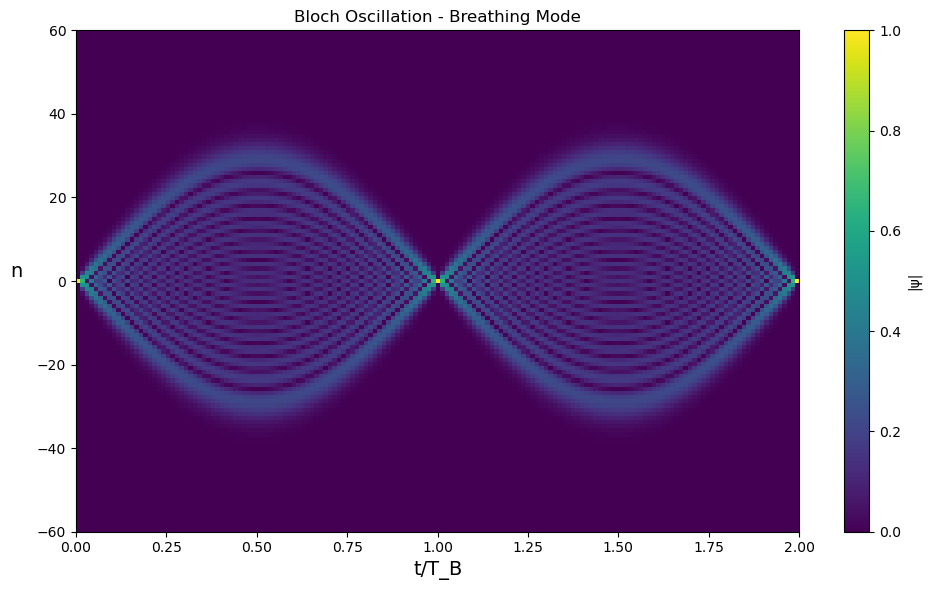

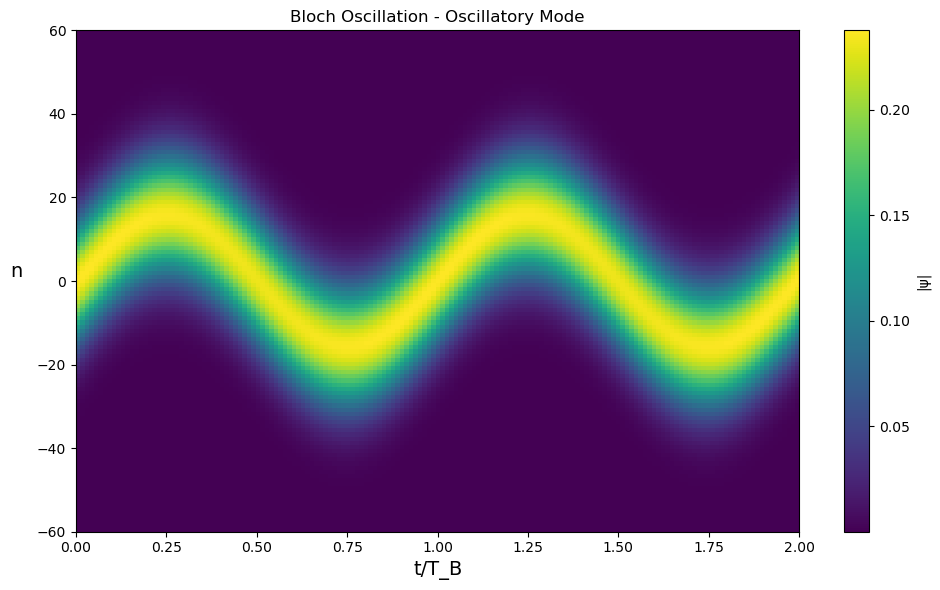

In [11]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def bloch_oscillation():
    d = 2 * np.pi
    F = 0.005
    Delta = 1
    
    # Define the lattice
    nmax = 60
    nmin = -60
    n = np.arange(nmin, nmax + 1)
    nn = len(n)
    
    # Create the tridiagonal Hamiltonian
    H = np.zeros((nn, nn), dtype=complex)
    
    # Set diagonal elements (d*F*n)
    np.fill_diagonal(H, d * F * n)
    
    # Set off-diagonal elements (Delta/4)
    for i in range(nn - 1):
        H[i, i+1] = Delta / 4
        H[i+1, i] = Delta / 4
    
    # Initial state (localized at n=0)
    psi = np.zeros(nn, dtype=complex)
    psi[nmin*(-1) + 0] = 1  # index where n=0
    
    # Time propagation parameters
    J = 80  # steps per Bloch period
    N_periods = 2  # number of Bloch periods
    
    # Store wavefunctions at each time
    Psi = np.zeros((nn, N_periods * J + 1), dtype=complex)
    Psi[:, 0] = psi
    
    # Calculate time evolution operator
    U = linalg.expm(-1j * H * 2 * np.pi / (d * F * J))
    
    # Propagate wavefunction
    for nt in range(N_periods * J):
        Psi[:, nt+1] = U @ Psi[:, nt]
    
    # Create time array
    t = np.arange(N_periods * J + 1) / J
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(Psi), aspect='auto', extent=[0, N_periods, nmin, nmax])
    plt.colorbar(label='|ψ|')
    plt.xlabel('t/T_B', fontsize=14)
    plt.ylabel('n', fontsize=14, rotation=0, labelpad=15)
    plt.title('Bloch Oscillation - Breathing Mode')
    plt.tight_layout()
    
    # Now let's also implement the Gaussian initial state
    sig = 0.005
    phi0 = np.pi / 2
    psi_gauss = np.exp(-sig * n**2 + 1j * n * phi0)
    psi_gauss = psi_gauss / np.sqrt(np.sum(np.abs(psi_gauss)**2))
    
    # Store wavefunctions for Gaussian initial state
    Psi_gauss = np.zeros((nn, N_periods * J + 1), dtype=complex)
    Psi_gauss[:, 0] = psi_gauss
    
    # Propagate Gaussian wavefunction
    for nt in range(N_periods * J):
        Psi_gauss[:, nt+1] = U @ Psi_gauss[:, nt]
    
    # Plot results for Gaussian initial state
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(Psi_gauss), aspect='auto', extent=[0, N_periods, nmin, nmax])
    plt.colorbar(label='|ψ|')
    plt.xlabel('t/T_B', fontsize=14)
    plt.ylabel('n', fontsize=14, rotation=0, labelpad=15)
    plt.title('Bloch Oscillation - Oscillatory Mode')
    plt.tight_layout()
    
    return Psi, Psi_gauss

Psi, Psi_gauss = bloch_oscillation()

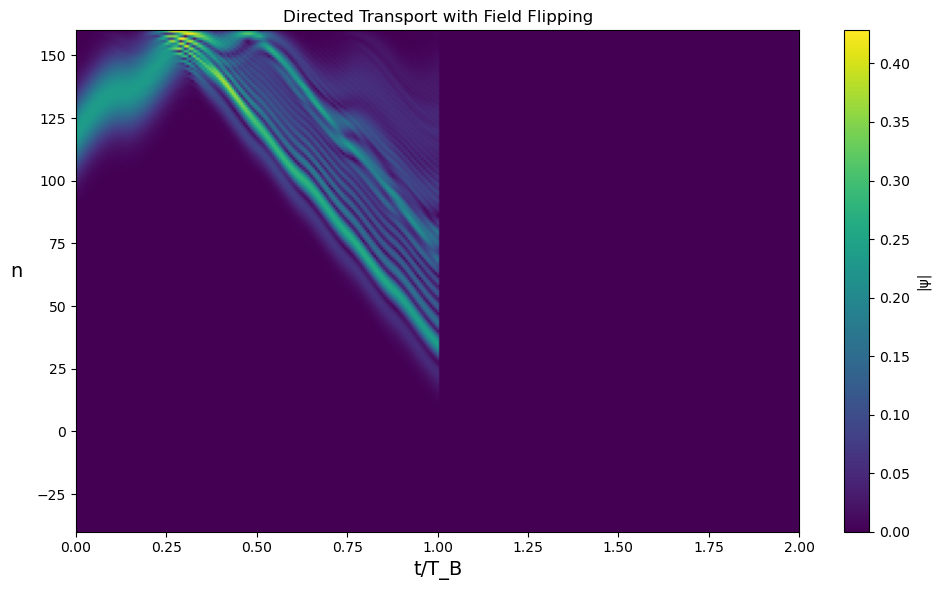

In [12]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def field_flip_system():
    d = 2 * np.pi
    F = 0.005
    Delta = 1
    
    # Define the lattice
    nmax = 160
    nmin = -40
    n = np.arange(nmin, nmax + 1)
    nn = len(n)
    
    # Create the tridiagonal Hamiltonians for positive and negative field
    Hp = np.zeros((nn, nn), dtype=complex)
    Hm = np.zeros((nn, nn), dtype=complex)
    
    # Set diagonal elements
    np.fill_diagonal(Hp, d * F * n)
    np.fill_diagonal(Hm, -d * F * n)
    
    # Set off-diagonal elements
    for i in range(nn - 1):
        Hp[i, i+1] = Delta / 4
        Hp[i+1, i] = Delta / 4
        Hm[i, i+1] = Delta / 4
        Hm[i+1, i] = Delta / 4
    
    # Initial state (Gaussian)
    sig = 0.005
    phi0 = np.pi / 2
    psi = np.exp(-sig * n**2 + 1j * n * phi0)
    psi = psi / np.sqrt(np.sum(np.abs(psi)**2))
    
    # Time propagation parameters
    J = 80  # steps per Bloch period
    N_periods = 2  # number of double-Bloch periods
    
    # Calculate time evolution operators
    Up = linalg.expm(-1j * Hp * 2 * np.pi / (d * F * J))
    Um = linalg.expm(-1j * Hm * 2 * np.pi / (d * F * J))
    
    # Store wavefunctions at each time
    Psi = np.zeros((nn, 2 * N_periods * J + 1), dtype=complex)
    Psi[:, 0] = psi
    
    # Propagate wavefunction with alternating field direction
    step_count = 0
    for nb in range(2 * N_periods):
        # First quarter with positive field
        for nt in range(J // 4):
            step_count += 1
            Psi[:, step_count] = Up @ Psi[:, step_count - 1]
        
        # Second quarter with negative field
        for nt in range(J // 4):
            step_count += 1
            Psi[:, step_count] = Um @ Psi[:, step_count - 1]
    
    # Create time array
    t = np.arange(step_count + 1) / J
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(Psi), aspect='auto', extent=[0, t[-1], nmin, nmax])
    plt.colorbar(label='|ψ|')
    plt.xlabel('t/T_B', fontsize=14)
    plt.ylabel('n', fontsize=14, rotation=0, labelpad=15)
    plt.title('Directed Transport with Field Flipping')
    plt.tight_layout()
    
    return Psi

Psi_flip = field_flip_system()

Commutator [Jx, Jy] - i*Jz (should be zero):
[[0.-4.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-2.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+2.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+4.j]]
Eigenvalues of rigid body Hamiltonian: [4.26794919 4.5        6.         7.5        7.73205081]


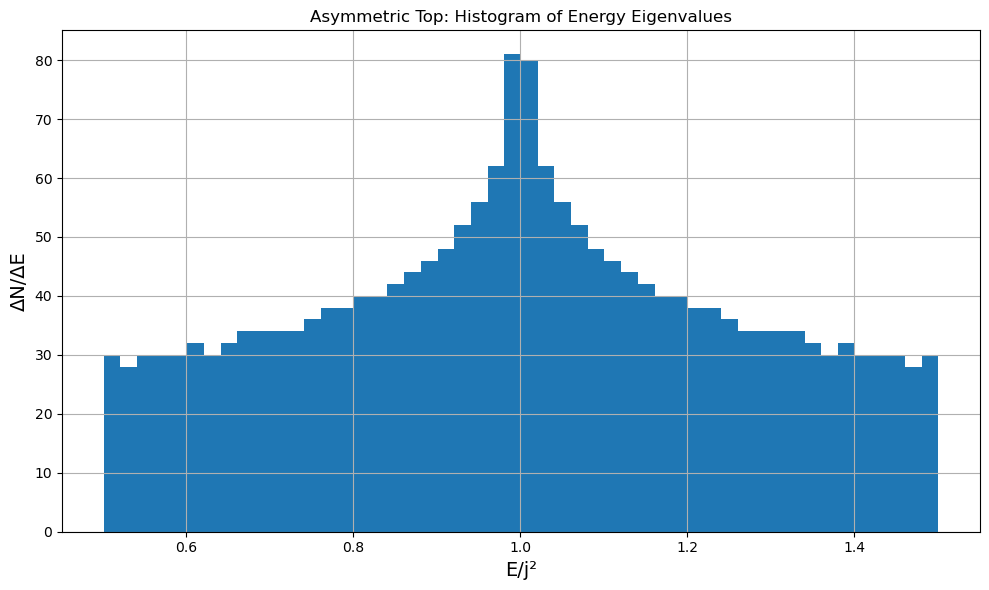

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def angular_momentum():
    j = 2
    m = np.arange(-j, j)
    
    # Create ladder operators J+ and J-
    Jp = np.diag(np.sqrt(j*(j+1) - m*(m+1)), 1)
    Jm = Jp.T.conj()
    
    # Create angular momentum operators
    Jx = (Jm + Jp) / 2
    Jy = -1j * (Jm - Jp) / 2
    Jz = (Jp @ Jm - Jm @ Jp) / 2
    
    # Check commutation relation [Jx, Jy] = i*Jz
    commutator = Jx @ Jy - Jy @ Jx - 1j * Jz
    print("Commutator [Jx, Jy] - i*Jz (should be zero):")
    print(commutator)
    
    # Calculate eigenvalues of rigid body Hamiltonian
    Ix = 1/3
    Iy = 1/2
    Iz = 1
    
    H = Jx @ Jx / (2 * Ix) + Jy @ Jy / (2 * Iy) + Jz @ Jz / (2 * Iz)
    E = np.sort(np.linalg.eigvals(H).real)
    print("Eigenvalues of rigid body Hamiltonian:", E)
    
    # Larger angular momentum example
    j_large = 1000
    m_large = np.arange(-j_large, j_large)
    
    # Create ladder operators for large j
    Jp_large = np.diag(np.sqrt(j_large*(j_large+1) - m_large*(m_large+1)), 1)
    Jm_large = Jp_large.T.conj()
    
    # Create angular momentum operators for large j
    Jx_large = (Jm_large + Jp_large) / 2
    Jy_large = -1j * (Jm_large - Jp_large) / 2
    Jz_large = (Jp_large @ Jm_large - Jm_large @ Jp_large) / 2
    
    # Calculate eigenvalues of rigid body Hamiltonian for large j
    H_large = Jx_large @ Jx_large / (2 * Ix) + Jy_large @ Jy_large / (2 * Iy) + Jz_large @ Jz_large / (2 * Iz)
    E_large = np.linalg.eigvals(H_large).real
    
    # Plot histogram of scaled eigenvalues
    plt.figure(figsize=(10, 6))
    plt.hist(E_large / j_large**2, bins=50)
    plt.xlabel('E/j²', fontsize=14)
    plt.ylabel('ΔN/ΔE', fontsize=14)
    plt.title('Asymmetric Top: Histogram of Energy Eigenvalues')
    plt.grid(True)
    plt.tight_layout()
    
    return E

eigenvalues = angular_momentum()

First 6 eigenvalues: [1.09796076 2.26337221 2.26337221 3.27911666 3.51571748 3.72140992]
Coefficient matrix for state 4
[[ 7.130e-02 -0.000e+00  6.752e-01 -0.000e+00 -6.010e-02 -0.000e+00
   5.700e-03  0.000e+00 -5.000e-04 -0.000e+00]
 [-0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
  -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 [ 6.752e-01  0.000e+00 -2.727e-01  0.000e+00  1.930e-02  0.000e+00
  -3.200e-03 -0.000e+00  1.000e-03 -0.000e+00]
 [ 0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 [-6.010e-02 -0.000e+00  1.930e-02 -0.000e+00  2.350e-02 -0.000e+00
  -7.800e-03 -0.000e+00  2.200e-03  0.000e+00]
 [ 0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 [ 5.700e-03  0.000e+00 -3.200e-03  0.000e+00 -7.800e-03 -0.000e+00
   9.000e-04  0.000e+00  2.000e-04  0.000e+00]
 [ 0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00  0.000e+00
  -0.00

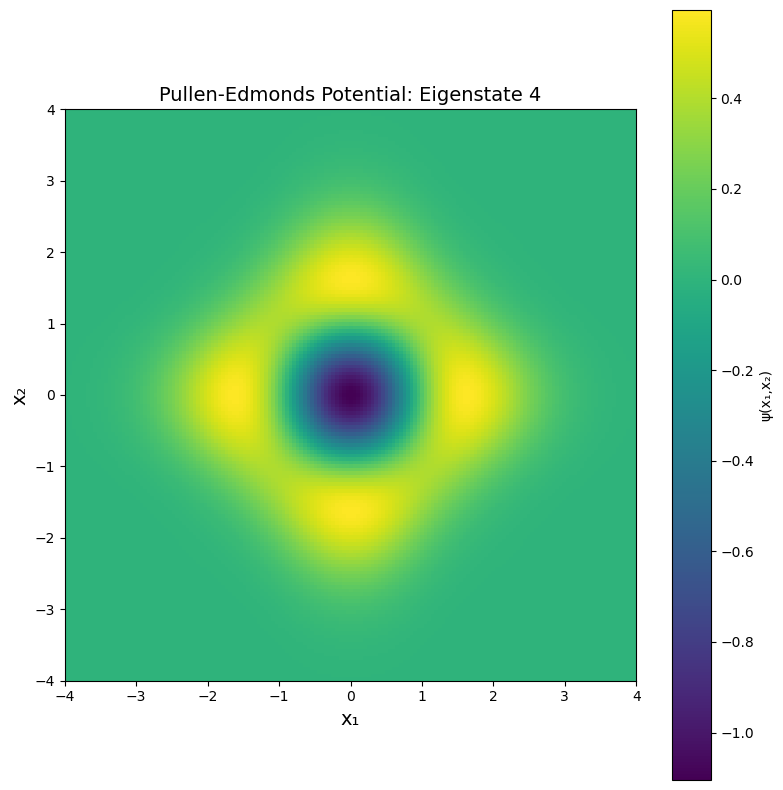

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def pullen_edmonds():
    N = 10
    nout = 6
    nplot = 4
    
    # Create position and momentum operators
    m = np.sqrt(np.arange(1, N))
    md = np.diag(m, -1)
    x = (1/np.sqrt(2)) * (md + md.T)
    p = (1j/np.sqrt(2)) * (md - md.T)
    I = np.eye(N)
    
    # Create tensor product operators for 2D
    x1 = np.kron(x, I)
    x2 = np.kron(I, x)
    p1 = np.kron(p, I)
    p2 = np.kron(I, p)
    
    # Create Pullen-Edmonds Hamiltonian
    alpha = 0.5
    H = p1 @ p1 / 2 + p2 @ p2 / 2 + x1 @ x1 / 2 + x2 @ x2 / 2 + alpha * x1 @ x1 @ x2 @ x2
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, C = linalg.eig(H)
    
    # Sort eigenvalues and eigenvectors
    idx = eigenvalues.real.argsort()
    E = eigenvalues.real[idx]
    C = C[:, idx]
    
    print("First 6 eigenvalues:", E[:nout])
    
    # Reshape coefficients of selected eigenstate
    Cplot = C[:, nplot].reshape(N, N)
    print("Coefficient matrix for state", nplot)
    print(np.real(Cplot).round(4))
    
    # Calculate harmonic oscillator wavefunctions
    xx = np.arange(-4, 4.05, 0.05)
    Nx = len(xx)
    hermval = np.zeros((Nx, N))
    
    # First two Hermite polynomials
    hermval[:, 0] = np.exp(-0.5 * xx**2)  # n = 0
    hermval[:, 1] = np.sqrt(2) * xx * np.exp(-0.5 * xx**2)  # n = 1
    
    # Recursion relation for higher Hermite polynomials
    for n in range(2, N):
        hermval[:, n] = (np.sqrt(2/n) * xx * hermval[:, n-1] - 
                         np.sqrt(1-1/n) * hermval[:, n-2])
    
    # Calculate 2D wavefunction using expansion
    psi = hermval @ Cplot @ hermval.T
    
    # Plot wavefunction
    plt.figure(figsize=(8, 8))
    plt.imshow(np.real(psi), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
    plt.colorbar(label='ψ(x₁,x₂)')
    plt.xlabel('x₁', fontsize=14)
    plt.ylabel('x₂', fontsize=14)
    plt.title(f'Pullen-Edmonds Potential: Eigenstate {nplot}', fontsize=14)
    plt.axis('square')
    plt.tight_layout()
    
    return E[:nout], psi

eigenvalues, wavefunction = pullen_edmonds()

Method 1 - Eigenvalues for fixed N=6: [-4.79234867  0.07861142  4.34778128  6.34859463 12.78601061 12.73135072
 24.5       ]
Method 2 - Eigenvalues for fixed N=6: [-4.79234867  0.07861142  4.34778128  6.34859463 12.73135072 12.78601061
 24.5       ]
Method 3 - Eigenvalues for fixed N=6: [-4.79234867  0.07861142  4.34778128  6.34859463 12.73135072 12.78601061
 24.5       ]


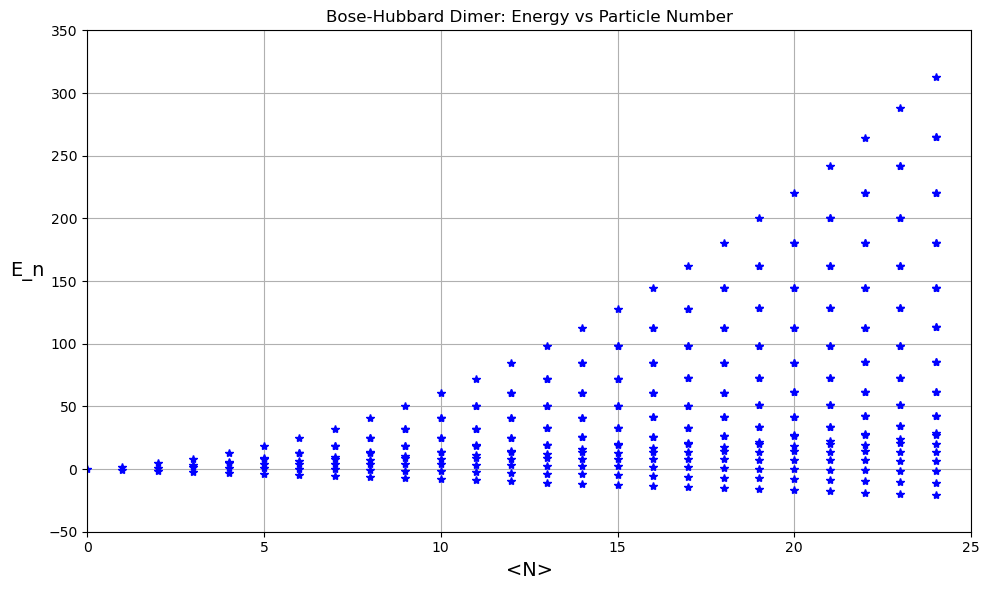

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def bose_hubbard_dimer():
    N = 24  # Number of particles
    Np = N + 1
    epsilon = 1
    v = 1
    c = 1
    
    # Create annihilation operator
    a = np.diag(np.sqrt(np.arange(1, N+1)), 1)
    ad = a.T  # Creation operator
    I = np.eye(Np)
    
    # Create tensor product operators
    a1 = np.kron(a, I)
    ad1 = a1.T
    a2 = np.kron(I, a)
    ad2 = a2.T
    
    # Create Hamiltonian
    H = epsilon * (ad1 @ a1 - ad2 @ a2) + v * (ad1 @ a2 + ad2 @ a1) + c/2 * (ad1 @ a1 - ad2 @ a2) @ (ad1 @ a1 - ad2 @ a2)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, C = linalg.eig(H)
    eigenvalues = eigenvalues.real
    
    # Calculate number operator expectation values
    N_op = ad1 @ a1 + ad2 @ a2
    Nav = np.diag(C.T.conj() @ N_op @ C).real
    
    # Sort by particle number
    idx = np.argsort(Nav)
    Nav = Nav[idx]
    E = eigenvalues[idx]
    
    # Plot eigenvalues vs particle number
    plt.figure(figsize=(10, 6))
    plt.plot(Nav[:Np*(Np+1)//2], E[:Np*(Np+1)//2], 'b*')
    plt.xlabel('<N>', fontsize=14)
    plt.ylabel('E_n', fontsize=14, rotation=0, labelpad=15)
    plt.title('Bose-Hubbard Dimer: Energy vs Particle Number')
    plt.axis([0, 25, -50, 350])
    plt.grid(True)
    plt.tight_layout()
    
    return E[:Np*(Np+1)//2], Nav[:Np*(Np+1)//2]

# Now let's also implement the fixed particle number approach
def bose_hubbard_fixed_N():
    N = 6  # Fixed particle number
    Np = N + 1
    epsilon = 1
    v = 1
    c = 1
    
    # Method 1: Adding a penalty term
    a = np.diag(np.sqrt(np.arange(1, Np)), 1)
    ad = a.T
    I = np.eye(Np)
    
    a1 = np.kron(a, I)
    ad1 = a1.T
    a2 = np.kron(I, a)
    ad2 = a2.T
    
    H = epsilon * (ad1 @ a1 - ad2 @ a2) + v * (ad1 @ a2 + ad2 @ a1) + c/2 * (ad1 @ a1 - ad2 @ a2) @ (ad1 @ a1 - ad2 @ a2)
    
    # Add penalty term
    lambda_val = 10000
    H1 = H - lambda_val * (ad1 @ a1 + ad2 @ a2 - N * np.eye(H.shape[0]))
    
    # Calculate eigenvalues
    E1 = np.linalg.eigvals(H1).real
    
    # Filter eigenvalues
    E2 = E1 * (np.abs(E1) < 10 * epsilon * N)
    E = E2[E2 != 0]
    
    print("Method 1 - Eigenvalues for fixed N=6:", E)
    
    # Method 2: Projection to fixed particle number subspace
    N_op = ad1 @ a1 + ad2 @ a2
    N_diag = np.diag(N_op).real
    iN = np.where(np.abs(N_diag - N) < 1e-6)[0]
    N_p = N_op[:, iN] / N
    H_N = N_p.T @ H @ N_p
    
    E_proj = np.sort(np.linalg.eigvals(H_N).real)
    print("Method 2 - Eigenvalues for fixed N=6:", E_proj)
    
    # Method 3: Jordan-Schwinger representation
    j = N / 2
    m = np.arange(-j, j)
    
    Jp = np.diag(np.sqrt(j*(j+1) - m*(m+1)), 1)
    Jm = Jp.T
    
    Jx = (Jm + Jp) / 2
    Jy = 1j * (Jm - Jp) / 2
    Jz = (Jp @ Jm - Jm @ Jp) / 2
    
    H_angular = 2 * epsilon * Jz + 2 * v * Jx + 2 * c * Jz @ Jz
    
    E_angular = np.sort(np.linalg.eigvals(H_angular).real)
    print("Method 3 - Eigenvalues for fixed N=6:", E_angular)
    
    return E, E_proj, E_angular

E, Nav = bose_hubbard_dimer()
E1, E2, E3 = bose_hubbard_fixed_N()

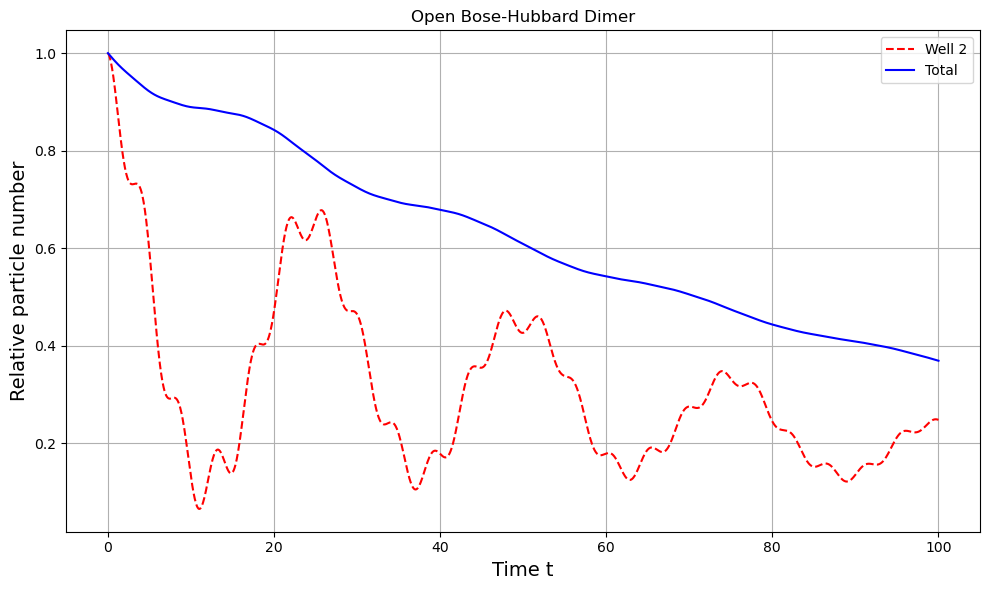

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def lindblad_master_equation():
    N = 2
    Np = N + 1
    epsilon = 0
    v = 0.3
    c = 0.6
    gamma = 0.02
    
    # Create operators
    a = np.diag(np.sqrt(np.arange(1, N+1)), 1)
    ad = a.T
    I = np.eye(Np)
    
    # Create tensor product operators
    a1 = np.kron(a, I)
    ad1 = a1.T
    a2 = np.kron(I, a)
    ad2 = a2.T
    
    # Create Hamiltonian
    H = epsilon * (ad1 @ a1 - ad2 @ a2) + v * (ad1 @ a2 + ad2 @ a1) + c/2 * (ad1 @ a1 - ad2 @ a2) @ (ad1 @ a1 - ad2 @ a2)
    
    # Initial state
    psi0_1 = np.zeros(Np, dtype=complex)
    psi0_1[0] = 1  # Ground state of left well
    
    psi0_2 = np.zeros(Np, dtype=complex)
    psi0_2[N] = 1  # N particles in right well
    
    psi0 = np.kron(psi0_1, psi0_2)  # Initial state
    rho = np.outer(psi0, psi0.conj())  # Initial density matrix
    
    # Time grid
    dt = 0.05
    num_steps = 2000
    tlist = np.arange(num_steps + 1) * dt
    
    # Particle number arrays
    n1 = np.zeros(len(tlist))
    n2 = np.zeros(len(tlist))
    
    # Implement predictor-corrector integration of Lindblad equation
    for l in range(len(tlist)):
        # Store particle numbers
        n2[l] = np.real(np.trace(rho @ ad2 @ a2))
        n1[l] = np.real(np.trace(rho @ ad1 @ a1))
        
        # Predictor-corrector steps
        for k in range(10):  # 10 substeps per interval dt
            # Predictor step
            rho_pred = rho - 1j * (H @ rho - rho @ H) * dt/10 + 0.5 * gamma * (
                a2 @ rho @ ad2 - ad2 @ a2 @ rho + a2 @ rho @ ad2 - rho @ ad2 @ a2) * dt/10
            
            # Midpoint
            rho_m = 0.5 * (rho + rho_pred)
            
            # Corrector step
            rho = rho - 1j * (H @ rho_m - rho_m @ H) * dt/10 + 0.5 * gamma * (
                a2 @ rho_m @ ad2 - ad2 @ a2 @ rho_m + a2 @ rho_m @ ad2 - rho_m @ ad2 @ a2) * dt/10
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(tlist, n2/N, 'r--', label='Well 2')
    plt.plot(tlist, (n1+n2)/N, 'b-', label='Total')
    plt.xlabel('Time t', fontsize=14)
    plt.ylabel('Relative particle number', fontsize=14)
    plt.title('Open Bose-Hubbard Dimer')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    return n1, n2, tlist

n1, n2, tlist = lindblad_master_equation()

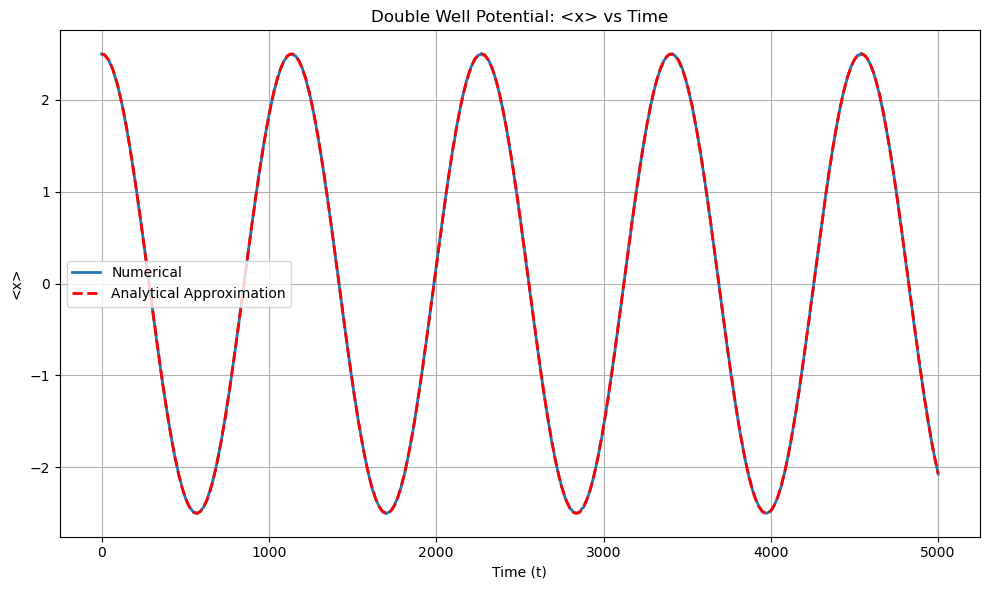

First 8 energy levels of the double well system: [0.49692414 0.50245981 1.4658074  1.52457191 2.37059862 2.60365649
 3.32602785 3.76676049]


In [28]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def double_well_potential():
    N = 100
    x0 = 2.5
    tstep = 10
    n_steps = 500

    # Ladder operators
    m = np.sqrt(np.arange(1, N))
    a = np.diag(m, 1)
    ad = a.T

    # Position and momentum operators
    x = (a + ad) / np.sqrt(2)
    p = 1j * (ad - a) / np.sqrt(2)

    # Double-well potential: V = 0.5 * (|x| - x0)^2
    abs_x = linalg.sqrtm((x @ x).real)
    V_dw = 0.5 * (abs_x - x0 * np.eye(N)) @ (abs_x - x0 * np.eye(N))
    H = p @ p / 2 + V_dw

    # Diagonalize full Hamiltonian
    eigvals_H, eigvecs_H = linalg.eig(H)
    idx_H = eigvals_H.real.argsort()
    eigvals_H = eigvals_H[idx_H].real
    eigvecs_H = eigvecs_H[:, idx_H]

    # Create initial state (ground state of right well)
    V_right = (x - x0 * np.eye(N)) @ (x - x0 * np.eye(N)) / 2
    H_right = p @ p / 2 + V_right
    evals_right, states_right = linalg.eig(H_right)
    psi0 = states_right[:, evals_right.real.argsort()[0]]

    # Time evolution setup
    U = linalg.expm(-1j * H * tstep)
    psi = psi0.copy()
    t_vals = [0]
    xav_vals = [np.real(psi.conj().T @ x @ psi)]

    # Time evolution loop
    for _ in range(n_steps):
        psi = U @ psi
        xav_vals.append(np.real(psi.conj().T @ x @ psi))
        t_vals.append(t_vals[-1] + tstep)

    # Analytical approximation
    delta_E = eigvals_H[1] - eigvals_H[0]
    approx = x0 * np.cos(delta_E * np.array(t_vals))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, xav_vals, label='Numerical', linewidth=2)
    plt.plot(t_vals, approx, 'r--', label='Analytical Approximation', linewidth=2)
    plt.xlabel('Time (t)')
    plt.ylabel('<x>')
    plt.title('Double Well Potential: <x> vs Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return eigvals_H[:8]

# Run the simulation
eigenvalues = double_well_potential()
print("First 8 energy levels of the double well system:", eigenvalues)
